In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr


In [4]:
df = pd.read_csv('nls.csv')
df

,R0000100,T5597600,T5684500,T9900000
0,1,-5,-5,12
1,2,2,-3,12
2,3,2,115000,12
3,4,2,112850,14
4,5,-5,-5,18
...,...,...,...,...
12681,12682,-5,-5,12
12682,12683,-5,-5,12
12683,12684,-5,-5,12
12684,12685,-5,-5,14


**R00001.00** = CASEID (IDENTIFICATION CODE)

**T55976.00** = Q11-GENHLTH_4B (RESPONDENT GENDER)

**T56845.00** = TNFW_TRUNC (FAMILY NET WEALTH (TRUNC))

**T99000.00** = HGC_EVER (HIGHEST GRADE RESPONDENT HAS EVER REPORTED COMPLETING AND GETTING CREDIT FOR)





In [5]:
remap = {'R0000100':'CASE_ID',
         'T5597600': 'GENDER',
         'T5684500': 'NET_WEALTH',
         'T9900000': 'HIGHEST_GRADE_EVER'
        }

In [6]:
df.rename(columns=remap, inplace=True)

In [7]:
df2 = df[(df['HIGHEST_GRADE_EVER']>0 ) & (df['NET_WEALTH']>0) ].copy()

In [8]:
df2

,CASE_ID,GENDER,NET_WEALTH,HIGHEST_GRADE_EVER
2,3,2,115000,12
3,4,2,112850,14
5,6,1,95825,16
7,8,2,172717,14
8,9,1,679000,14
...,...,...,...,...
12565,12566,2,88000,14
12588,12589,1,249280,13
12642,12643,1,26900,12
12662,12663,1,62000,13


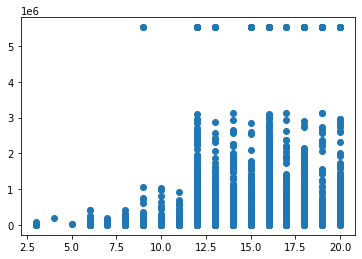

In [9]:
plt.scatter(df2['HIGHEST_GRADE_EVER'], df2['NET_WEALTH'])

In [10]:
college2 = df2[(df2['HIGHEST_GRADE_EVER']>=16) & (df2['HIGHEST_GRADE_EVER']<18)].copy()

In [11]:
gradschool2 = df2[ df2['HIGHEST_GRADE_EVER']>=18].copy()

In [12]:
college2.median()

CASE_ID                 3970.0
GENDER                     2.0
NET_WEALTH            427000.0
HIGHEST_GRADE_EVER        16.0
dtype: float64

In [13]:
gradschool2.median()

CASE_ID                 3855.0
GENDER                     2.0
NET_WEALTH            484400.0
HIGHEST_GRADE_EVER        18.0
dtype: float64

##  Test on means

In [25]:
pooled=np.array(df2[df2['HIGHEST_GRADE_EVER']>=16]['NET_WEALTH'])

In [26]:
diff = gradschool2['NET_WEALTH'].mean() - college2['NET_WEALTH'].mean()
print(diff)
num_sims = 10_000
count=0
for sim in range(num_sims):
  sample_diff = npr.choice(pooled, len(gradschool2)).mean() - \
    npr.choice(pooled, len(college2)).mean()
  if sample_diff >= diff:
    count+=1
print(count/num_sims)

140006.5459489664
0.0374


##  Test on medians

In [27]:
print(gradschool2['NET_WEALTH'].median(), college2['NET_WEALTH'].median())


484400.0 427000.0


In [28]:
diff = gradschool2['NET_WEALTH'].median() - college2['NET_WEALTH'].median()
num_sims = 10_000
count=0
for sim in range(num_sims):
  sample_diff = np.median(npr.choice(pooled, len(gradschool2))) - \
    np.median(npr.choice(pooled, len(college2)))
  if sample_diff >= diff:
    count+=1
print(count/num_sims)

0.0898


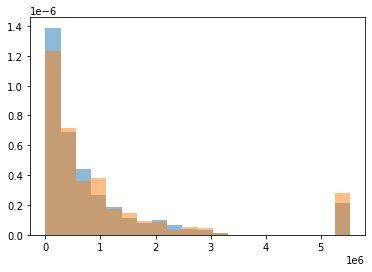

In [29]:
plt.hist(college2['NET_WEALTH'], bins=20, alpha=0.5, density=True)
plt.hist(gradschool2['NET_WEALTH'], bins=20, alpha=0.5, density=True);


## Test on millionaire/multimillionaire proportion

In [30]:
def find_proportion(df, index, thresh):
  return len(df[df[index] >thresh])/len(df) 

In [31]:
thresh = 1_000_000
diff = find_proportion(gradschool2, 'NET_WEALTH', thresh) -find_proportion(college2, 'NET_WEALTH', thresh)
print(find_proportion(gradschool2, 'NET_WEALTH', thresh), find_proportion(college2, 'NET_WEALTH', thresh))
print(diff)
num_sims = 10_000
count=0
for sim in range(num_sims):
  sample_diff = np.sum(npr.choice(pooled, len(gradschool2))>thresh)/len(gradschool2) - \
    np.sum(npr.choice(pooled, len(college2))>thresh)/len(college2) 
  if sample_diff >= diff:
    count+=1
print(count/num_sims)

0.29809725158562367 0.24482338611449453
0.05327386547112914
0.0188


In [32]:
print(len(gradschool2), len(college2), len(pooled))

473 821 1294


In [33]:
thresh = 2_000_000
diff = find_proportion(gradschool2, 'NET_WEALTH', thresh) -find_proportion(college2, 'NET_WEALTH', thresh)
print(diff)
num_sims = 10_000
count=0
for sim in range(num_sims):
  sample_diff = np.count_nonzero(npr.choice(pooled, len(gradschool2))>thresh)/len(gradschool2) - \
    np.count_nonzero(npr.choice(pooled, len(college2))>thresh)/len(college2) 
  if sample_diff >= diff:
    count+=1
print(count/num_sims)

0.013181985563936113
0.2515


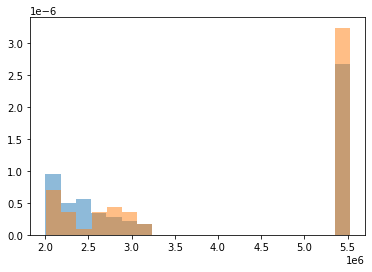

In [34]:
plt.hist(college2[college2['NET_WEALTH']>2_000_000]['NET_WEALTH'], bins=20, alpha=0.5, density=True)
plt.hist(gradschool2[gradschool2['NET_WEALTH']>2_000_000]['NET_WEALTH'], bins=20, alpha=0.5, density=True);

## Male Only

In [23]:
gradschool2m=gradschool2[gradschool2['GENDER']==1]
college2m=college2[college2['GENDER']==1]

In [24]:
gradschool2m.mean()

CASE_ID               4.667188e+03
GENDER                1.000000e+00
NET_WEALTH            1.308276e+06
HIGHEST_GRADE_EVER    1.887054e+01
dtype: float64

In [25]:
college2m.mean()

CASE_ID                 4832.046392
GENDER                     1.000000
NET_WEALTH            949025.646907
HIGHEST_GRADE_EVER        16.188144
dtype: float64

In [26]:
diff = find_proportion(gradschool2m, 'NET_WEALTH', thresh)  - \
    find_proportion(college2m, 'NET_WEALTH', thresh) 
diff


0.05536634756995584

In [27]:
pooledm = np.array(df2[(df2['HIGHEST_GRADE_EVER']>12) & (df2['GENDER']==1)]['NET_WEALTH'])

In [28]:
diff = find_proportion(gradschool2m, 'NET_WEALTH', thresh)  - \
      find_proportion(college2m, 'NET_WEALTH', thresh)
num_sims = 10_0
count=0
for sim in range(num_sims):
  sample_diff = np.count_nonzero(npr.choice(pooledm, len(gradschool2m))>thresh)/len(gradschool2m) - \
                np.count_nonzero(npr.choice(pooledm, len(college2m))>thresh)/len(college2m)  
     
  #print(sample_diff)  
  if sample_diff >= diff:
    count+=1
print(count/num_sims)

0.04


## Female only (different result for male!)

In [29]:
gradschool2f=gradschool2[gradschool2['GENDER']==2]
college2f=college2[college2['GENDER']==2]

In [30]:
diff = gradschool2f['NET_WEALTH'].mean() - college2f['NET_WEALTH'].mean()
diff

-57377.78719496925

In [31]:
gradschool2f.mean()

CASE_ID                 4255.518072
GENDER                     2.000000
NET_WEALTH            809320.674699
HIGHEST_GRADE_EVER        18.734940
dtype: float64

In [32]:
college2f.mean()

CASE_ID                 4489.401848
GENDER                     2.000000
NET_WEALTH            866698.461894
HIGHEST_GRADE_EVER        16.198614
dtype: float64

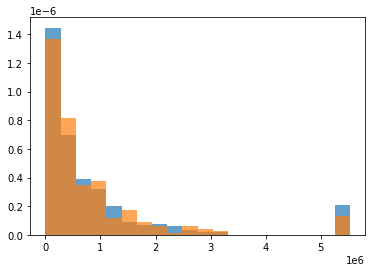

In [33]:
plt.hist(college2f['NET_WEALTH'], bins=20, alpha  = 0.7, density=True)
plt.hist(gradschool2f['NET_WEALTH'], bins=20, alpha = 0.7, density=True);


In [34]:
len(college2f[college2f['NET_WEALTH'] >5e6])/len(college2f),\
len(gradschool2f[gradschool2f['NET_WEALTH'] >5e6])/len(gradschool2f)

(0.057736720554272515, 0.03614457831325301)

In [35]:
pooledf = np.array(df2[(df2['HIGHEST_GRADE_EVER']>12) & (df2['GENDER']==2)]['NET_WEALTH'])

In [36]:
diff = find_proportion(college2f, 'NET_WEALTH', thresh) - find_proportion(gradschool2f, 'NET_WEALTH', thresh) 
num_sims = 10_0
count=0
for sim in range(num_sims):
  sample_diff = np.count_nonzero(npr.choice(pooledf, len(college2f))>thresh)/len(college2f)  - \
    np.count_nonzero(npr.choice(pooledf, len(gradschool2f))>thresh)/len(gradschool2f) 
  #print(sample_diff)  
  if sample_diff >= diff:
    count+=1
print(count/num_sims)

0.08


## Income-based and other stuff I'm not using

In [ ]:
college = df2[(df2['HIGHEST_GRADE_EVER']>12) & (df2['HIGHEST_GRADE_EVER']<17)].copy()

In [ ]:
college.mean()

In [ ]:
gradschool = df2[ df2['HIGHEST_GRADE_EVER']>=17].copy()

In [ ]:
gradschool.mean()

In [ ]:
len(college[college['INCOME'] >200000])

In [ ]:
gradschool[gradschool['INCOME'] >200000]

In [ ]:
noncollege = df2[(df2['HIGHEST_GRADE_EVER']> 0) & (df2['HIGHEST_GRADE_EVER']<=12)].copy()

In [ ]:
noncollege.mean()

In [ ]:
thresh=250000

In [ ]:
noncollege[noncollege['INCOME'] >thresh]

In [ ]:
len(noncollege[noncollege['INCOME'] >thresh])/len(noncollege) 

In [ ]:
len(college[college['INCOME'] >thresh]), len(college[college['INCOME'] >thresh])/len(college) 

In [ ]:
len(gradschool[gradschool['INCOME'] >thresh]), len(gradschool[gradschool['INCOME'] >thresh])/len(gradschool) 

In [ ]:
thresh = 3_000_000
find_proportion(noncollege, 'NET_WEALTH', thresh), \
  find_proportion(college, 'NET_WEALTH', thresh), \
  find_proportion(gradschool, 'NET_WEALTH', thresh)

In [ ]:
len(college[college['NET_WEALTH'] >thresh]), len(college)

In [ ]:
len(gradschool[gradschool['NET_WEALTH'] >thresh]),len(gradschool)

In [ ]:
import numpy as np
pooled=np.array(df2[df2['HIGHEST_GRADE_EVER']>12]['NET_WEALTH'])

In [ ]:
import numpy.random as npr

In [ ]:
thresh = 2_000_000
diff = find_proportion(gradschool, 'NET_WEALTH', thresh) -find_proportion(college, 'NET_WEALTH', thresh)
num_sims = 100_000
count=0
for sim in range(num_sims):
  sample_diff = np.count_nonzero(npr.choice(pooled, len(gradschool))>thresh)/len(gradschool) - \
    np.count_nonzero(npr.choice(pooled, len(college))>thresh)/len(college) 
  if sample_diff >= diff:
    count+=1
print(count/num_sims)

In [ ]:
df2[df2['NET_WEALTH']>2_000_000]